In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC


import warnings
warnings.filterwarnings('ignore')

In [30]:
churn = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', None)
churn = churn.drop('Unnamed: 0', axis = 1)
churn.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Age,Married,Number_of_Dependents,Zip_Code,Population,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction,Churn_Value
0,1,1,25,3.0,1,19.76,0,1,1.0,13,0,1,1,0,1,1,0,0,3,1,1,102.440,2514.50,13.43,327.0,494.00,2,78,1,1,90303,27778,5337,2.0,1,1,1,1
1,1,1,37,3.0,1,6.33,1,1,2.0,15,0,0,0,0,0,0,0,0,3,1,1,79.560,2868.15,0.00,430.0,234.21,2,80,1,1,90602,26265,2793,3.0,1,0,1,1
2,0,0,27,3.0,1,3.33,1,1,1.0,20,0,0,1,0,0,0,0,0,3,1,1,81.172,2135.50,0.00,427.0,89.91,2,72,0,1,90660,63288,4638,1.0,0,0,1,1
3,1,1,1,5.0,1,15.28,0,1,2.0,33,0,0,0,0,0,0,0,0,3,1,3,73.268,70.45,0.00,0.0,15.28,2,76,1,2,90720,21343,3964,5.0,7,0,1,1
4,1,6,58,2.0,0,0.00,0,1,2.0,26,0,1,1,0,0,1,0,0,3,1,1,47.112,2651.20,40.95,689.0,0.00,1,66,1,0,91024,10558,5444,2.0,2,1,1,1


In [31]:
mms = MinMaxScaler()

X = churn.iloc[:, 0:37] 
y = churn.iloc[:, -1]

X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    stratify = y, 
                                                    random_state = 0)

In [32]:
dtc_param = {'max_depth': [3, 5, 7, 9, None]}
dtc = DecisionTreeClassifier()
dtcCV = GridSearchCV(dtc, dtc_param)
dtcCV.fit(X_train, y_train)
print(dtcCV.best_estimator_) 
y_pred = dtcCV.predict(X_train)
print(f1_score(y_train, y_pred))

DecisionTreeClassifier(max_depth=3)
1.0


In [33]:
knn_param = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn, knn_param)
knnCV.fit(X_train, y_train)
print(knnCV.best_estimator_)
y_pred = knnCV.predict(X_train)
print(f1_score(y_train, y_pred))

KNeighborsClassifier(n_neighbors=3)
0.9857627118644068


In [34]:
svc_param = {'kernel':('linear', 'rbf'), 'C':[1, 3, 5, 7, 9]}
svc = SVC()
svcCV = GridSearchCV(svc, svc_param)
svcCV.fit(X_train, y_train)
print(svcCV.best_estimator_)
y_pred = svcCV.predict(X_train)
print(f1_score(y_train, y_pred))

SVC(C=1, kernel='linear')
1.0


In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_train)
print(f1_score(y_train,y_pred))

1.0


In [36]:
clf1 = DecisionTreeClassifier(max_depth = 3)
clf2 = KNeighborsClassifier(n_neighbors = 3)
clf3 = SVC(kernel = 'linear', C = 3, probability = True)
clf4 = GaussianNB()

eclf = VotingClassifier(estimators=[('dt', clf1), 
                                    ('knn', clf2), 
                                    ('svc', clf3), 
                                    ('gnb', clf4)],
                                    voting='hard')

In [41]:
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_train)
print(f1_score(y_train, y_pred))

1.0


In [42]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
y_pred1 = clf1.predict(X_train)
y_pred2 = clf2.predict(X_train)
y_pred3 = clf3.predict(X_train)
y_pred4 = clf4.predict(X_train)

print(f1_score(y_train, y_pred1))
print(f1_score(y_train, y_pred2))
print(f1_score(y_train, y_pred3))
print(f1_score(y_train, y_pred4))

1.0
0.9857627118644068
1.0
1.0


1.0


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

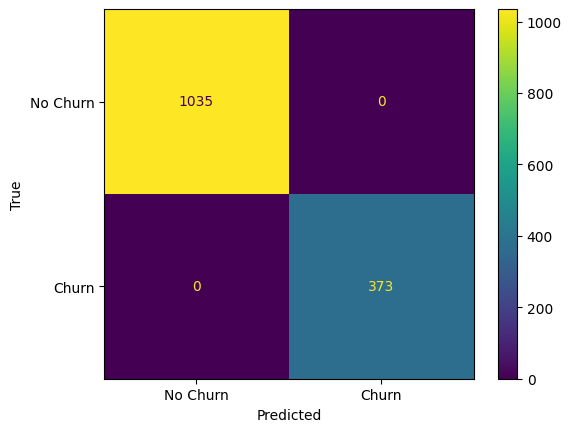

In [43]:
y_pred = eclf.predict(X_test)
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)

print(accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['No Churn', 'Churn'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')